In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
from lightgbm import LGBMRegressor

In [54]:
df_data = jb.load('df_data.pkl.z')
df_data

,x,y,z,b1,b2,b3,b4,b5,b6,b7,b8,b2b4,b3b4,ndwi15,ndwi24,ndwi53
0,1324,1076,5.750000,0.005298,0.010901,0.022501,0.021049,0.018481,0.013979,0.020390,0.016952,0.784021,1.021888,-0.554381,-0.317649,-0.098092
1,1324,1077,5.608810,0.005298,0.010777,0.022501,0.021161,0.018481,0.013979,0.020390,0.019481,0.778914,1.020117,-0.554381,-0.325150,-0.098092
2,1325,1075,6.010455,0.006965,0.012071,0.024026,0.021244,0.019515,0.009853,0.010949,0.011941,0.815018,1.040264,-0.473956,-0.275367,-0.103609
3,1325,1076,5.870476,0.005298,0.009908,0.022134,0.019040,0.018481,0.013979,0.020390,0.011342,0.778332,1.051099,-0.554381,-0.315441,-0.089933
4,1326,1074,6.640000,0.007867,0.014787,0.024582,0.021229,0.020979,0.008503,0.013503,0.012797,0.881638,1.047995,-0.454519,-0.178874,-0.079089
5,1326,1075,6.396154,0.007867,0.013671,0.023847,0.022346,0.020979,0.008503,0.013503,0.012027,0.841830,1.020929,-0.454519,-0.240860,-0.063988
6,1327,1074,6.851875,0.007867,0.013795,0.022621,0.022457,0.020979,0.008503,0.013503,0.011587,0.843384,1.002342,-0.454519,-0.238953,-0.037683
7,1328,1073,7.092381,0.008076,0.014545,0.023900,0.023459,0.021205,0.011682,0.016167,0.011167,0.848520,1.005903,-0.448391,-0.234530,-0.059739
8,1328,1074,7.087000,0.008006,0.014585,0.023678,0.023125,0.019091,0.012004,0.010785,0.010940,0.853246,1.007523,-0.409064,-0.226475,-0.107251
9,1329,1072,7.170000,0.008076,0.015537,0.025002,0.022230,0.021205,0.011682,0.016167,0.010947,0.884502,1.037887,-0.448391,-0.177215,-0.082176


In [55]:
lgbm = jb.load('trained_model_baseline.pkl.z')
mdl = jb.load('trained_model_boost.pkl.z')

In [56]:
z = lgbm.predict(df_data.drop(['x','y','z'],axis=1))

In [57]:
df_result = pd.DataFrame(z, columns=['z_pred'])

In [58]:
df_result['z_mean'] = df_data['z']

In [59]:
df_result['error'] = abs(df_result['z_mean'] - df_result['z_pred'])

In [60]:
df_result['z_mean_rd'] = df_result['z_mean'].apply(np.floor)

In [61]:
df_depth = df_result.drop(['z_pred','z_mean'],axis=1).groupby('z_mean_rd').mean().reset_index()
df_depth.columns = ['depth_round_down','mean_abs_error']
df_depth['percent_error'] = 100*df_depth['mean_abs_error'] / df_depth['depth_round_down']
df_depth

,depth_round_down,mean_abs_error,percent_error
0,1.0,1.518613,151.861262
1,2.0,1.299194,64.959712
2,3.0,1.171676,39.055879
3,4.0,0.961792,24.044805
4,5.0,0.997208,19.944164
5,6.0,1.035772,17.262867
6,7.0,1.096713,15.667324
7,8.0,1.111567,13.894590
8,9.0,1.332780,14.808670
9,10.0,1.558045,15.580446


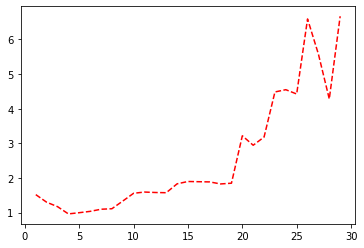

In [62]:
plt.plot(df_depth['depth_round_down'], df_depth['mean_abs_error'], 'r--')
plt.show()

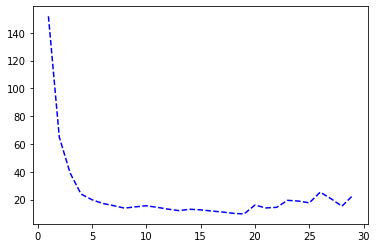

In [63]:
plt.plot(df_depth['depth_round_down'], df_depth['percent_error'], 'b--')
plt.show()